# WHO Dataset

### About Dataset
DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are tasked with coming up with a policy framework by looking at the data government got from WHO. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government.

The descriptions of the columns in the dataset are as follows:
- Age: continuous - age of a Person
- Workclass: Where do a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- Fnlwgt: This weight is assigned by the Current Population Survey (CPS). People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics - continuous
- Education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- Education-num: no. of years a person studied - continuous.
- Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- Sex: Female, Male.
- Capital-gain: Investment gain of the person other than salary - continuous
- Capital-loss: Loss from investments - continuous
- Hours-per-week: No. of hours a person works - continuous.
- Native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- Salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

#### Objective
- What are the different factors that influence the income of an individual?

- Is there a good predictive model for income that exists? What does the performance assessment look like for such a model?

### Load the dataset
#### Import the required packages

In [102]:
#Importing the libraries for data manipulation and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline 
from typing import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score,precision_score, recall_score, f1_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('who_data.csv')

df.head()

age          workclass  fnlwgt   education  education_no_of_years  \
0   39          State-gov   77516   Bachelors                     13   
1   50   Self-emp-not-inc   83311   Bachelors                     13   
2   38            Private  215646     HS-grad                      9   
3   53            Private  234721        11th                      7   
4   28            Private  338409   Bachelors                     13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  working_hours_per_week  native_country  salary  
0          2174             0                      40   United-States   <=50K  
1             0             0                      13   United-States   <=50K  
2             0             0                      40   United-States   <=50K  
3             0             0                      40   United-States   <=50K  
4             0             0                      40            Cuba   <=50K

### Explore the dataset

In [3]:
# check the first few rows of the data


df.shape

(32561, 15)

In [4]:
# Check the data types


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

- This shows that the dataset contains 6 numerical variables and 9 characters variables. 
- Salary is the target variable.

In [5]:
# check for missing values


df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

- There are no missing values but this does not mean the data is clean, there might be some inconsistent values

In [6]:
# display some descriptive statistics of the data


df.describe()

age        fnlwgt  education_no_of_years  capital_gain  \
count  32561.000000  3.256100e+04           32561.000000  32561.000000   
mean      38.581647  1.897784e+05              10.080679   1077.648844   
std       13.640433  1.055500e+05               2.572720   7385.292085   
min       17.000000  1.228500e+04               1.000000      0.000000   
25%       28.000000  1.178270e+05               9.000000      0.000000   
50%       37.000000  1.783560e+05              10.000000      0.000000   
75%       48.000000  2.370510e+05              12.000000      0.000000   
max       90.000000  1.484705e+06              16.000000  99999.000000   

       capital_loss  working_hours_per_week  
count  32561.000000            32561.000000  
mean      87.303830               40.437456  
std      402.960219               12.347429  
min        0.000000                1.000000  
25%        0.000000               40.000000  
50%        0.000000               40.000000  
75%        0.000000               45.000000  
max     4356.000000               99.000000

### The above show the statical summary of the dataset for numerical variables
- Age: The individuals' ages range from 17 to 90 years, with an average age of approximately 38.6 years. The standard deviation suggests some variation in age.

- Final Weight (fnlwgt): 

- Education Years: The dataset includes individuals with different levels of education. On average, individuals have completed around 10.1 years of education. The standard deviation indicates some variation in education levels.

- Capital Gain: The average reported capital gain is approximately 1077.6, with a large standard deviation of 7385.3, suggesting significant variation in this measure. Capital gains represent profits from the sale of assets.

- Capital Loss: On average, individuals reported a capital loss of about 87.3. The standard deviation is 402.96, indicating variability in this measure.

- Working Hours per Week: Individuals in the dataset work an average of around 40.4 hours per week. The majority of individuals (25th to 75th percentile) work between 40 and 45 hours per week.

In [7]:
# select only the features that are object data types and observe

cat_df = df.select_dtypes(include = 'object')
cat_df.describe()


workclass education       marital_status       occupation relationship  \
count      32561     32561                32561            32561        32561   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race    sex  native_country  salary  
count    32561  32561           32561   32561  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27816  21790           29170   24720

### The above show the statical summary of the dataset for categorical cal variables
- Workclass: There are 9 unique categories in the "workclass" variable. The most frequent category is "Private" with a frequency of 22,696, indicating that a significant number of individuals in the dataset work in the private sector.

- Education: There are 16 unique categories representing different levels of education. The most common education level is "HS-grad" (high school graduate), with a frequency of 10,501.

- Marital_status: This variable has 7 unique categories representing different marital statuses. The most frequent category is "Married-civ-spouse," occurring 14,976 times.

- Occupation: There are 15 unique categories representing different occupations. The most common occupation is "Prof-specialty" (professional specialty), with a frequency of 4,140.

- Relationship: This variable has 6 unique categories representing different relationships to others. The most frequent category is "Husband," occurring 13,193 times.

- Race: There are 5 unique categories representing different racial backgrounds. The most common race is "White," with a frequency of 27,816.

- Sex: This variable has 2 unique categories representing gender. The most frequent category is "Male," occurring 21,790 times.

- Native_country: There are 42 unique categories representing different countries of origin. The most common country is the "United States," with a frequency of 29,170.

- Salary: This variable represents salary or income levels. There are 2 unique categories, and the most frequent category is "<=50K" (indicating a salary of less than or equal to 50,000), occurring 24,720 times.

#### Explore each variable to note the issue with each varaible


##### Print all the categories with their counts

In [8]:
for col in cat_df:
    print(df[col].value_counts())
    print('.' * 50)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
..................................................
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
..................................................
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Nam

This reveal there are some inconsistent in the dataset like '?' in workclass, occupation, and native_country. This need to be check and clean

# Data Cleaning

In [9]:
# Check the null in the dataset
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

### Cleaning Work_Class

In [10]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [11]:
# Replace' ?' values in workclass variable with `NaN`
df['workclass'].replace(' ?', np.NaN, inplace=True)

In [12]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [13]:
#check the nan in worclass
df['workclass'].isnull().sum()

1836

In [14]:
# impute missing NAN variables in 'workclass' with most frequent value
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)

In [15]:
# Sanity check
df['workclass'].isnull().sum()

0

### Cleaning Occupation

In [16]:
# view the unique labels

df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [17]:
# view frequency distribution of values of occupation

df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

We can see that there are 1843 values encoded as ? in workclass variable. I will replace these ? with NaN

In [18]:
# replace '?' values in Occupattion variable with `NaN`

df['occupation'].replace(' ?', np.NaN, inplace=True)

In [19]:
#check the nan in worclass
df['occupation'].isnull().sum()

1843

In [20]:
# impute missing NAN variables in 'workclass' with most frequent value
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

In [25]:
# Sanity check
df['workclass'].isnull().sum()

0

In [26]:
# Sanity check

df.occupation.value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

### Cleaning Native_Country

In [27]:
# view the unique labels

df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [28]:
# view frequency distribution of values of occupation

df.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

This reveal that there are 643 values encoded as ? in native_country variable. I will replace these '?' with NaN

In [29]:
# replace '?' values in Occupattion variable with `NaN`

df['native_country'].replace(' ?', np.NaN, inplace=True)

In [30]:
#check the nan in worclass
df['native_country'].isnull().sum()

583

In [31]:
# impute missing NAN variables in 'workclass' with most frequent value
df['native_country'].fillna(df['native_country'].mode()[0], inplace=True)

In [32]:
# Sanity check

df.native_country.value_counts()

 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

## Data Visualization

##### Univariate Analysis: Numerical Features


In [33]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

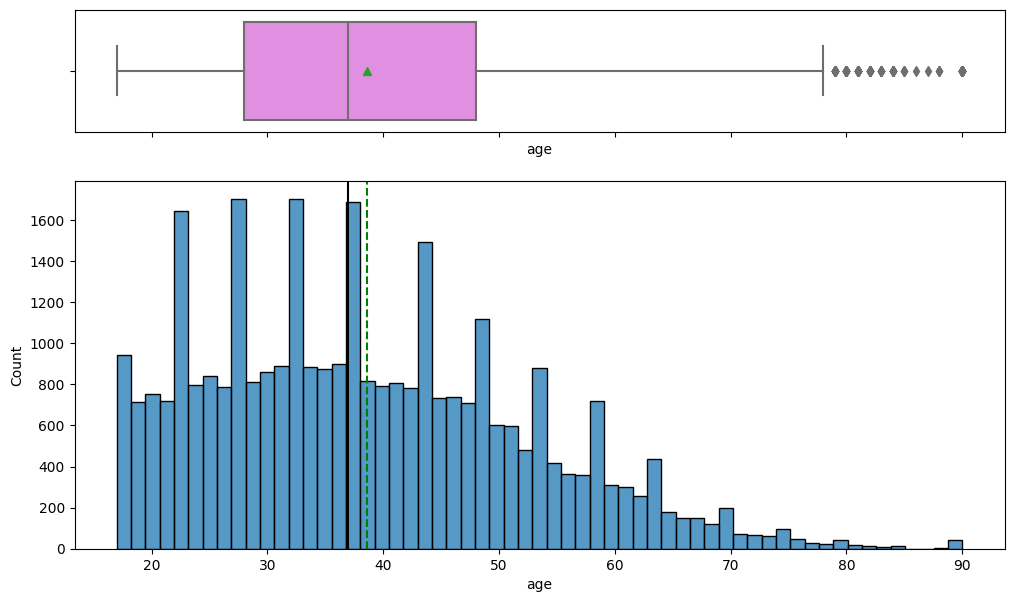

In [34]:
histogram_boxplot(data = df, feature = 'age')

We can see that age is slightly positively skewed and there are lots of outliers in age variable.

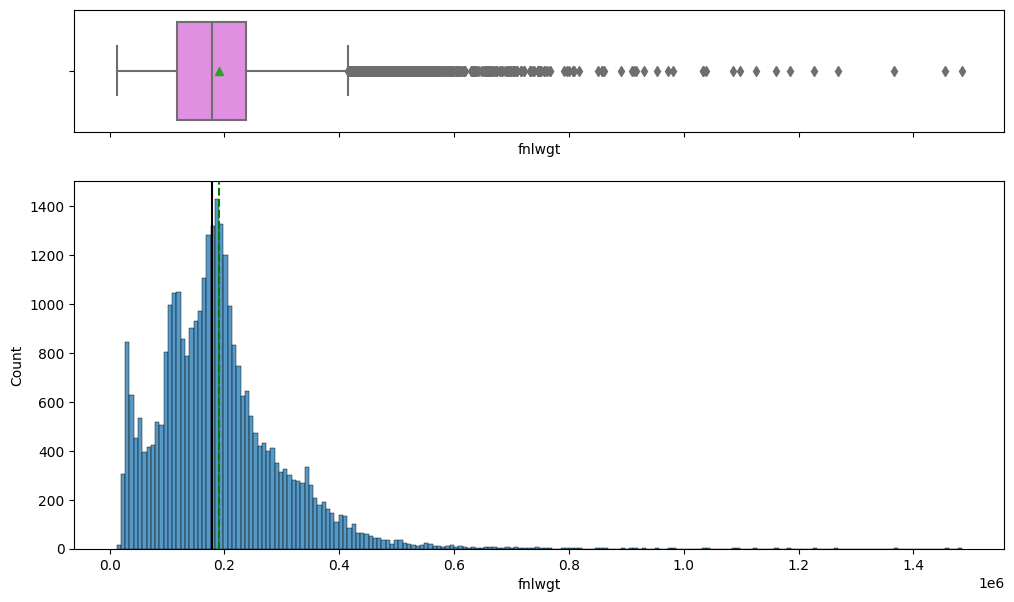

In [35]:
histogram_boxplot(data = df, feature = 'fnlwgt')

We can see that final weight is slightly positively skewed and there are lots of outliers in final weight variable.

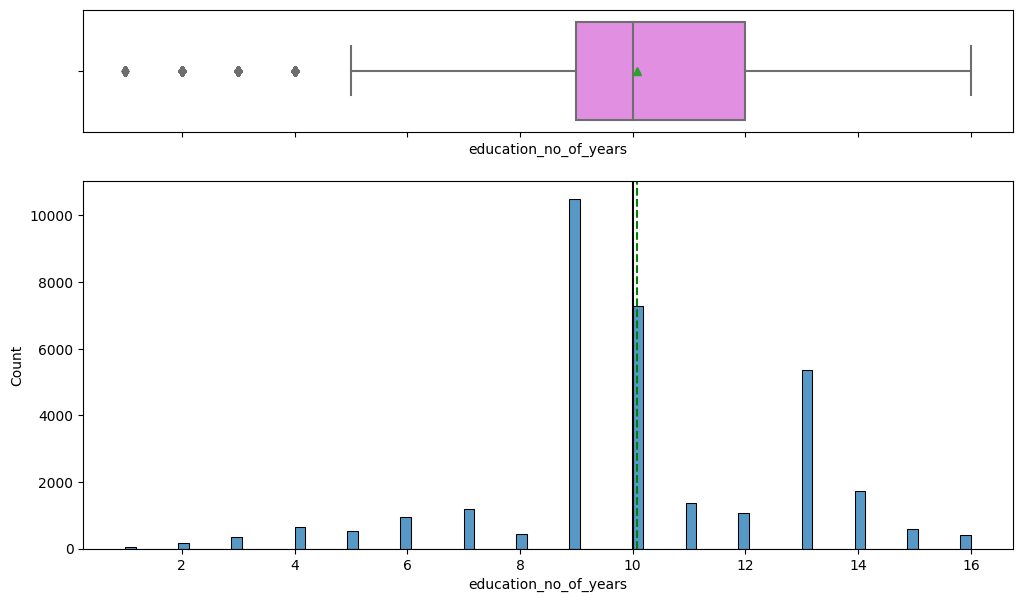

In [36]:
histogram_boxplot(data = df, feature = 'education_no_of_years')

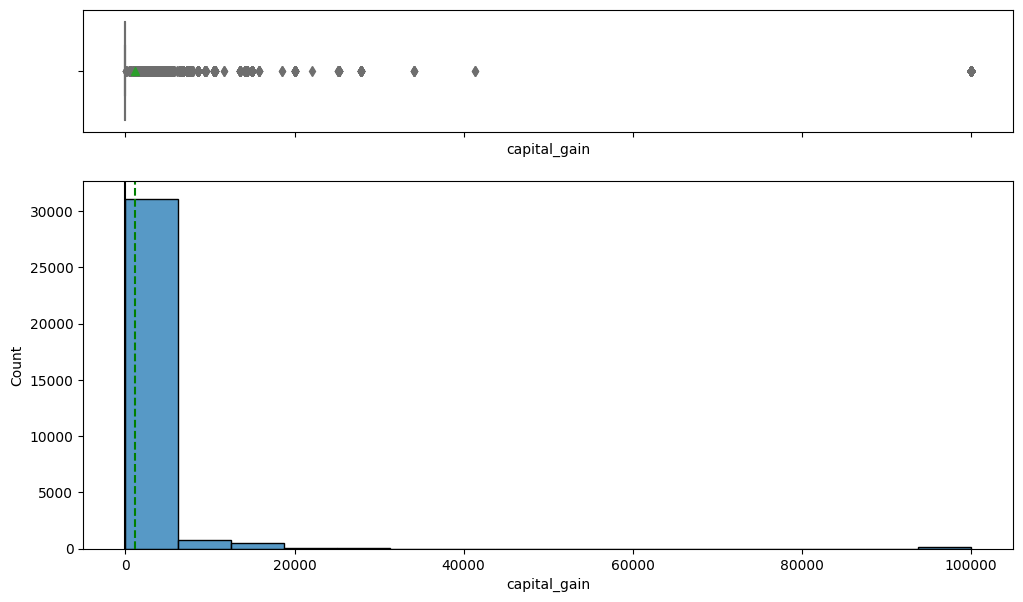

In [37]:
histogram_boxplot(data = df, feature = 'capital_gain')

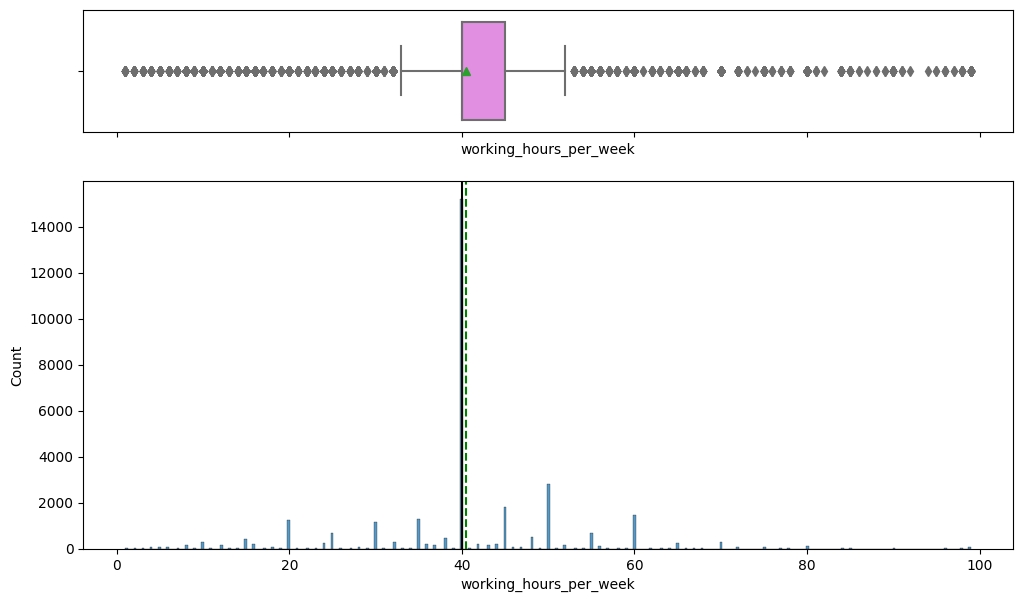

In [38]:
histogram_boxplot(data = df, feature = 'working_hours_per_week')

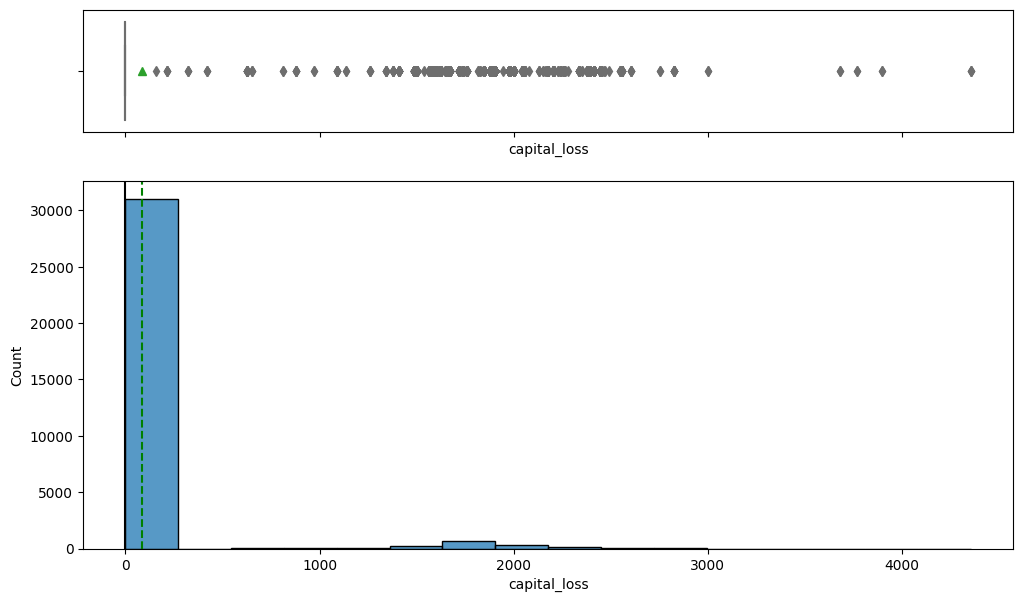

In [39]:
histogram_boxplot(data = df, feature = 'capital_loss')

## Univariate Analysis: Categorical Features

In [40]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, title = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(title)
    plt.show()  # show the plot

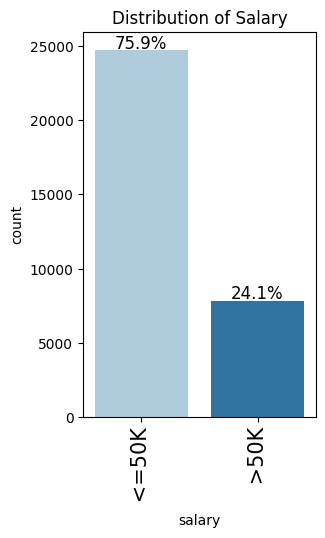

In [41]:
labeled_barplot(data = df, feature = 'salary', perc = True, title = 'Distribution of Salary')

The plot above shows that 76% of the people in the dataset where getting above 50k  as salary and 24% where getting less than 50k as salary 

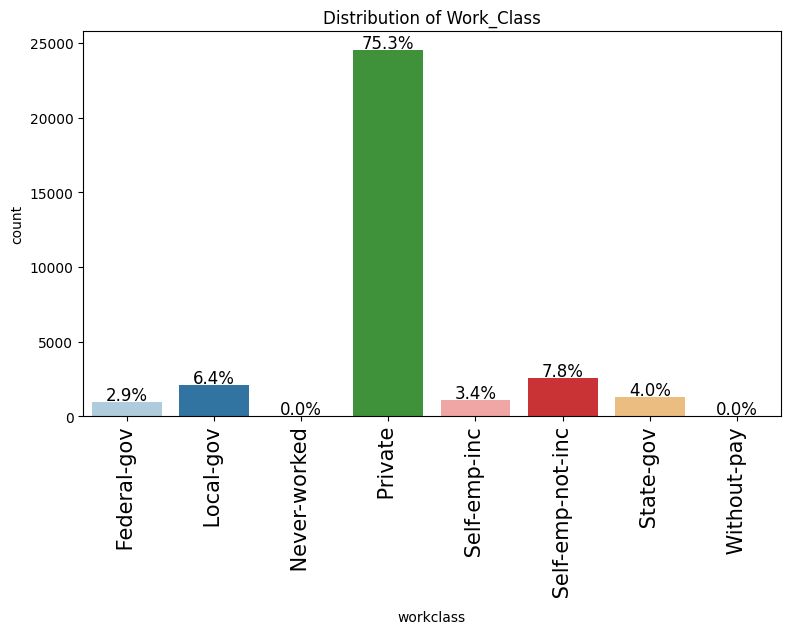

In [42]:
labeled_barplot(data = df, feature = 'workclass', perc = True, title = 'Distribution of Work_Class')

The plot above shows that 70% of dataset were working in a private organisation while few people are working in the government parastater. This show that government are not proving jobs for the people. 

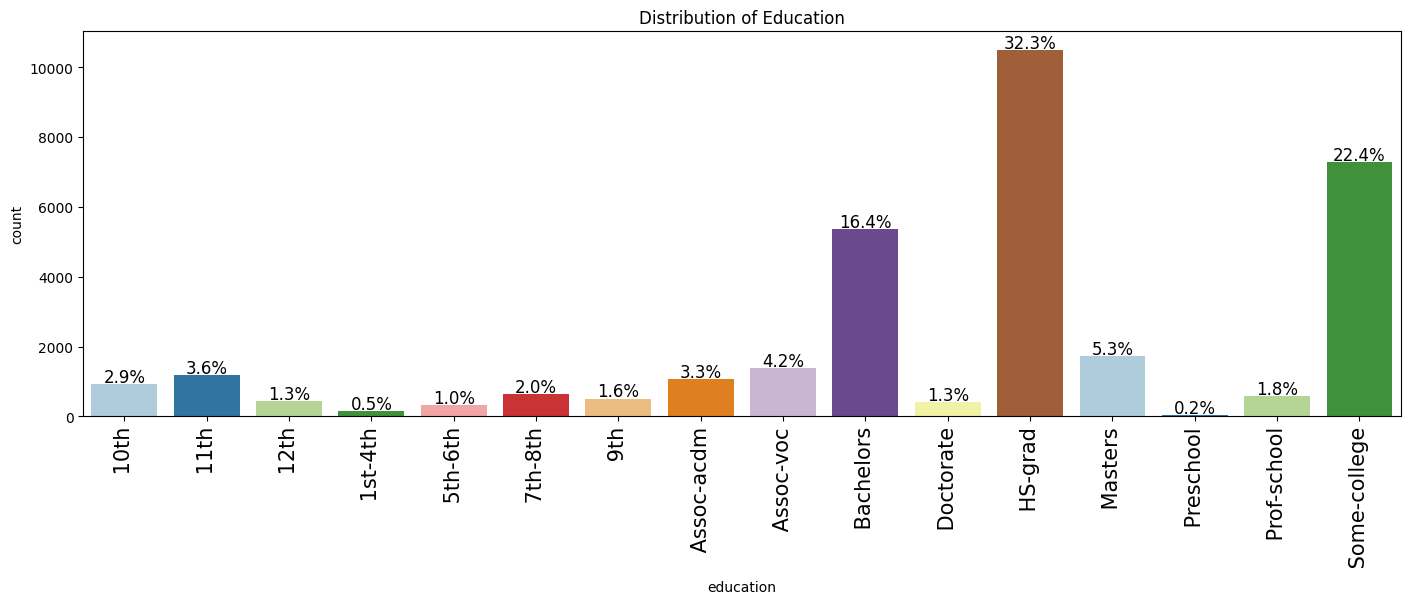

In [43]:
labeled_barplot(data = df, feature = 'education', perc = True, title = 'Distribution of Education')

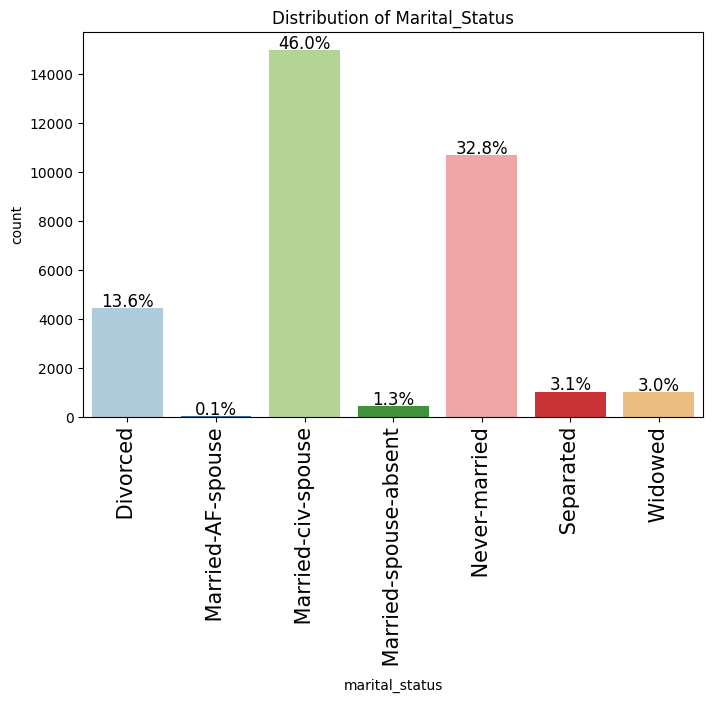

In [44]:
labeled_barplot(data = df, feature = 'marital_status', perc = True, title = 'Distribution of Marital_Status')

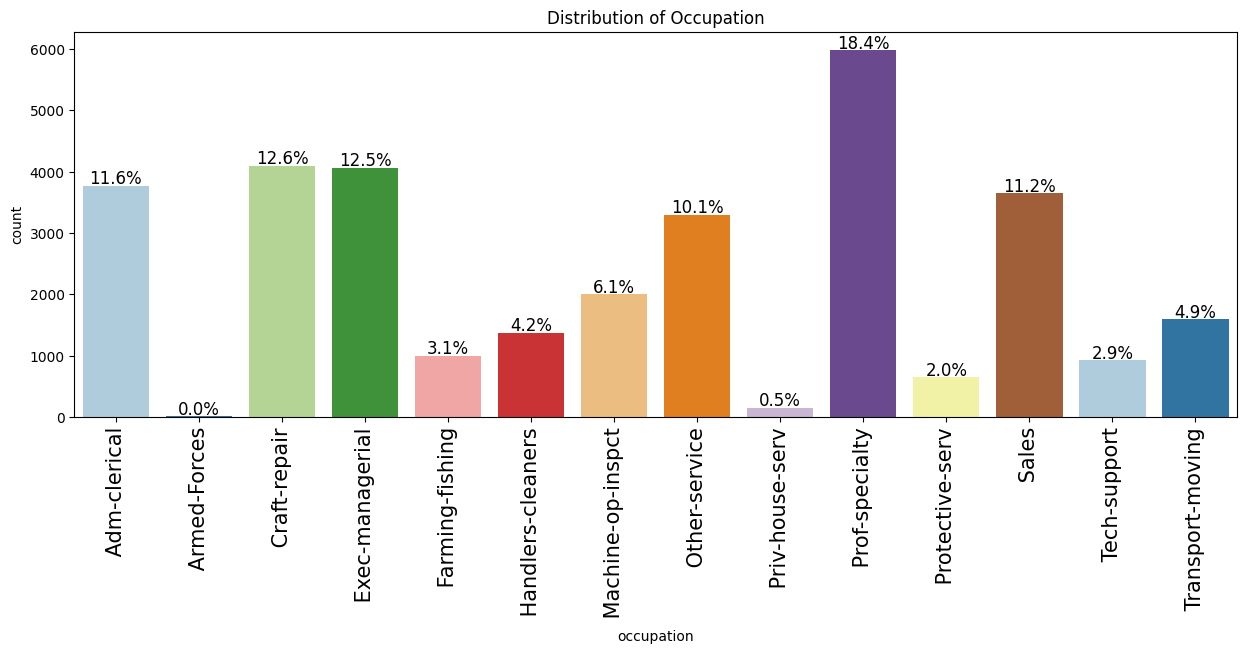

In [45]:
labeled_barplot(data = df, feature = 'occupation', perc = True, title = 'Distribution of Occupation')

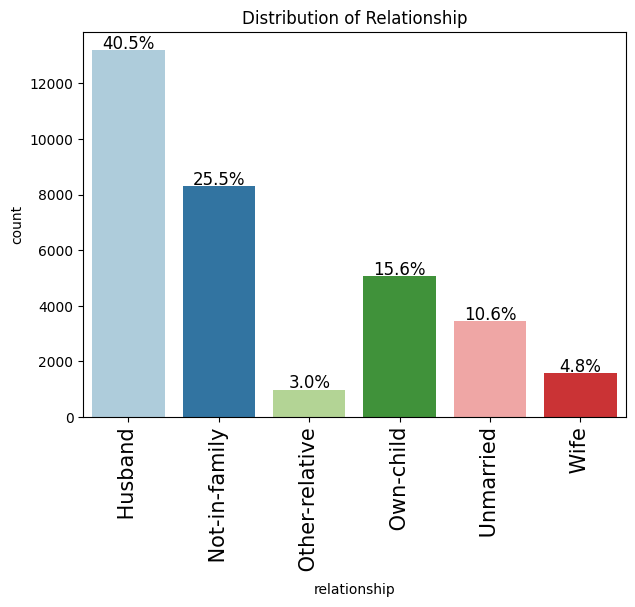

In [46]:
labeled_barplot(data = df, feature = 'relationship', perc = True, title = 'Distribution of Relationship')

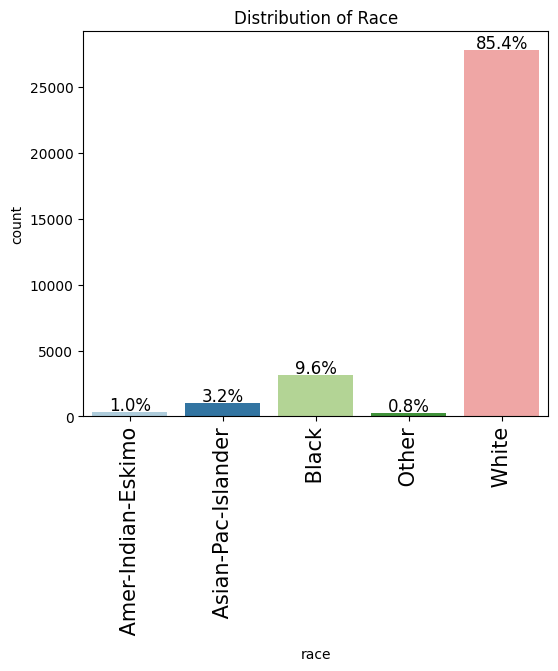

In [47]:
labeled_barplot(data = df, feature = 'race', perc = True, title = 'Distribution of Race')

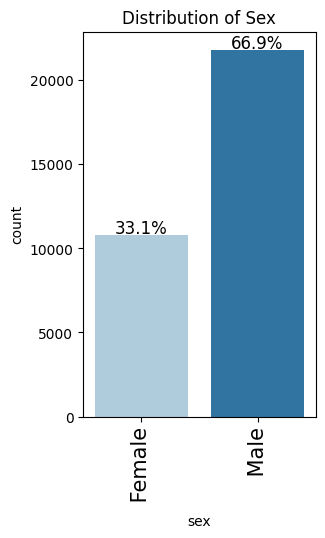

In [48]:
labeled_barplot(data = df, feature = 'sex', perc = True, title = 'Distribution of Sex')

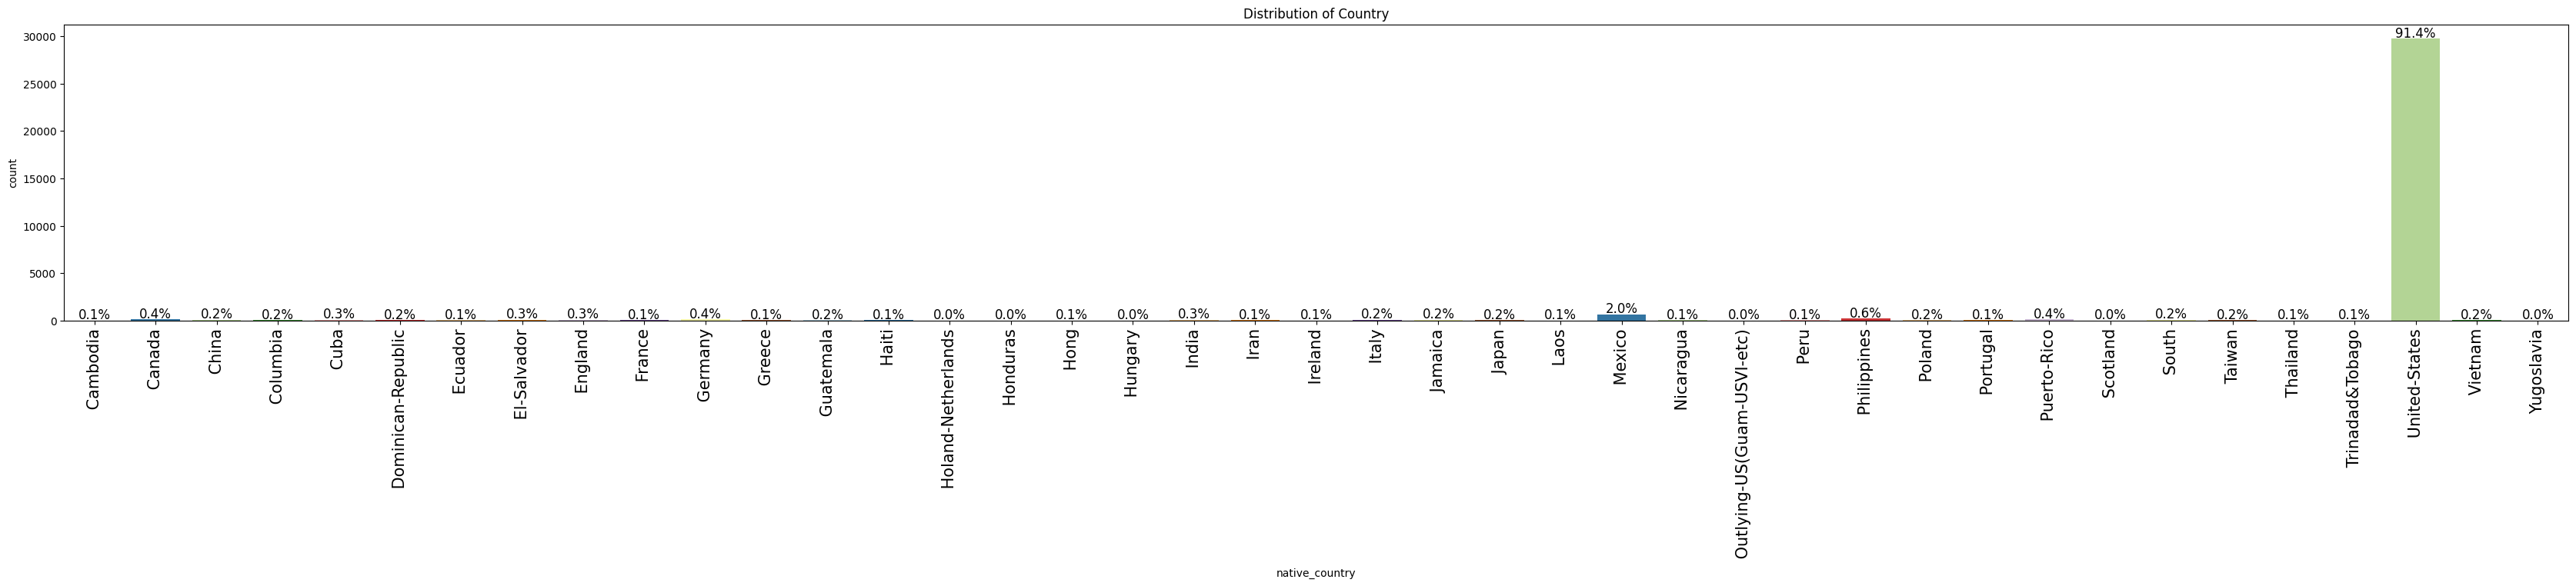

In [49]:
labeled_barplot(data = df, feature = 'native_country', perc = True, title = 'Distribution of Country')

Most of people in this dataset are in United State while remaining 2% were from Maxco

## Bivariate Analysis

### Ages against Salary

<Figure size 1000x500 with 0 Axes>

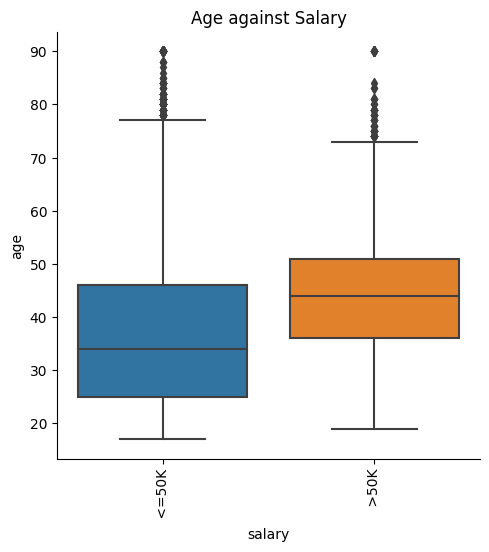

In [50]:
# Relationship between Age and Marital Status
plt.figure(figsize = (10, 5))
sns.catplot(x = 'salary', y = 'age', data = df, kind = 'box')
plt.title('Age against Salary')
#plt.savefig(f'Ages against Marital Status.png')
plt.xticks(rotation = 90);

In [51]:
df.groupby("salary")["age"].describe()

count       mean        std   min   25%   50%   75%   max
salary                                                             
 <=50K  24720.0  36.783738  14.020088  17.0  25.0  34.0  46.0  90.0
 >50K    7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  90.0

The plot and the summary revealed that there are more people that are recieving <50k with 24720, the mean age is 36, the minimum age of the prople recieving <50k were 17 years of age and we can also see that there are prople that were 90 that are recieving <50k as salary.
This also show that there were 7841 people that are collecting above 50K as salary, while the minimum age in this dataset that are collecting above 50K salary are 19 years of age. it also revealed that there people with old age that are still collecting above 50K as salary. 

Younger people make less money as compared to senior people.

### Salary against Sex

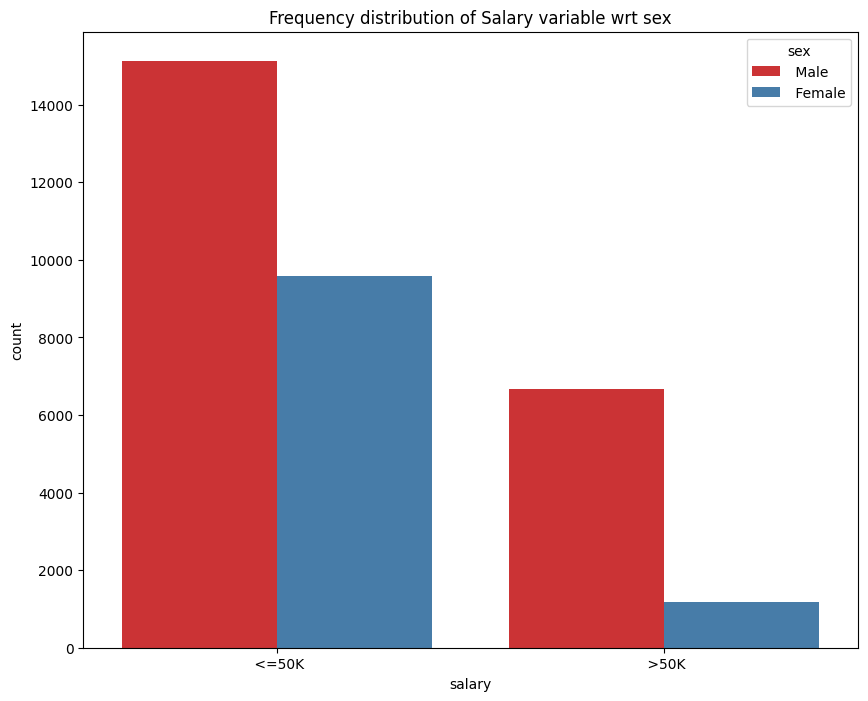

In [52]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="salary", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of Salary variable wrt sex")
plt.show()

The plot shows that males make more money than females in both the salary categories.

### Salary variable with respect to Relationship

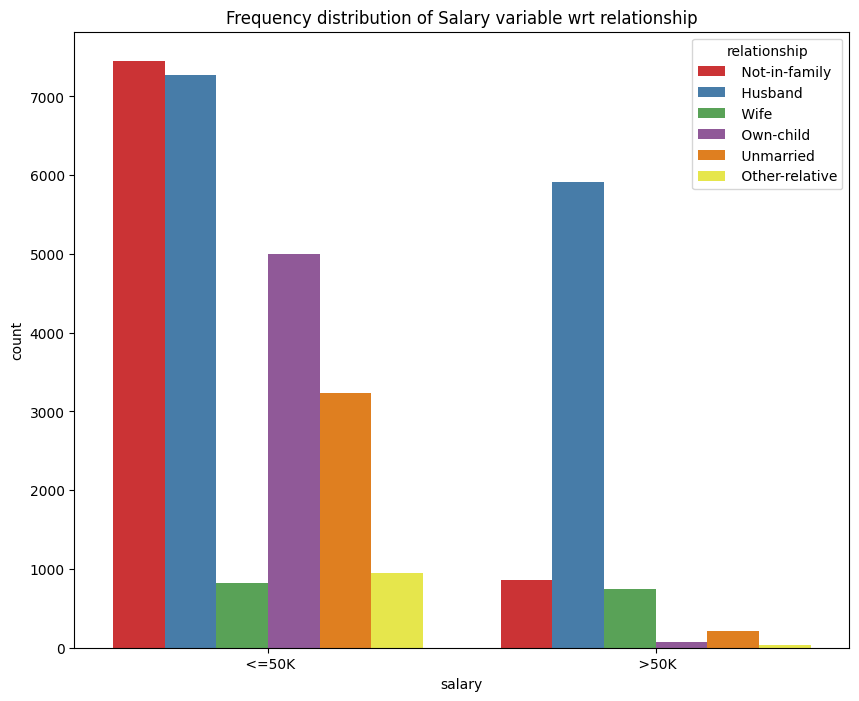

In [53]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="salary", hue="relationship", data=df, palette="Set1")
ax.set_title("Frequency distribution of Salary variable wrt relationship")
plt.show()

The plot reveal that people that are not family and husband are making more money than wife and unmarried in both the salary category, in the salary of people below 50K it reveal that Own-child is making more money than the wife and unmarried.

### Salary variable with respect to Working Class

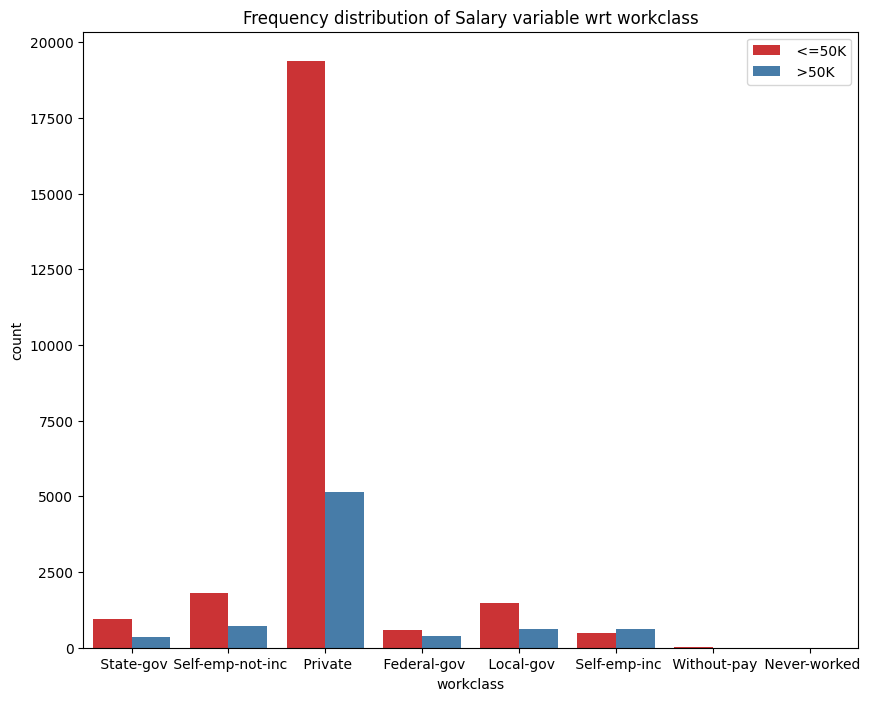

In [54]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="workclass", hue="salary", data=df, palette="Set1")
ax.set_title("Frequency distribution of Salary variable wrt workclass")
ax.legend(loc='upper right')
plt.show()

The plot reveal that workers make below 5OK in most of the working categories. The trend is more appealing in Private workclass category.

### Sex variable with respect to Working Class

<Figure size 1000x500 with 0 Axes>

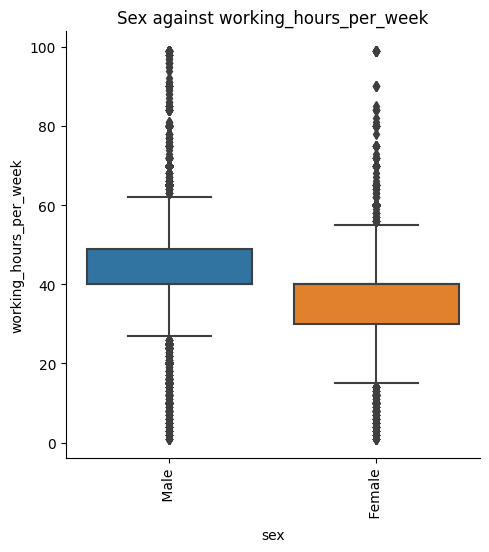

In [55]:
# Relationship between Sex and Working Hours Per Week
plt.figure(figsize = (10, 5))
sns.catplot(x = 'sex', y = 'working_hours_per_week', data = df, kind = 'box')
plt.title('Sex against working_hours_per_week')
#plt.savefig(f'sex against Working Hours Per Wwwk')
plt.xticks(rotation = 90);

In [56]:
df.groupby("sex")["working_hours_per_week"].describe()

count       mean        std  min   25%   50%   75%   max
sex                                                                
 Female  10771.0  36.410361  11.811300  1.0  30.0  40.0  40.0  99.0
 Male    21790.0  42.428086  12.119755  1.0  40.0  40.0  49.0  99.0

The plot and the summary revealed that on avarage male working hours pre week is hight than that of female. Therefore male more than female that why male are getting more imcome salary than female.  

### Race variable with respect to Age

<Figure size 1000x500 with 0 Axes>

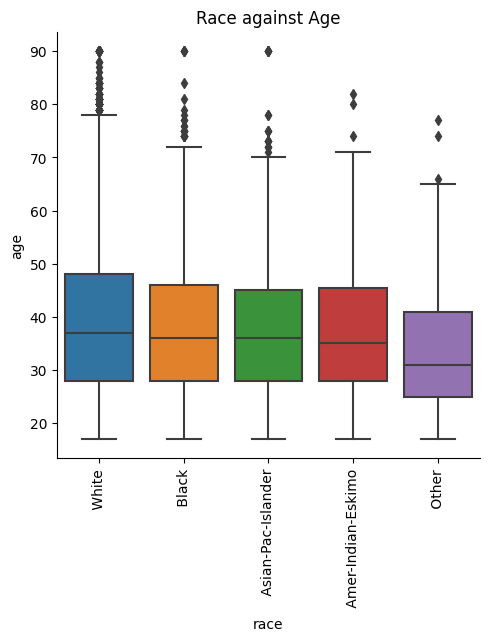

In [57]:
# Relationship between Race and Age
plt.figure(figsize = (10, 5))
sns.catplot(x = 'race', y = 'age', data = df, kind = 'box')
plt.title('Race against Age')
plt.xticks(rotation = 90);

The plot show that white are more older than other groups of people in the this dataset

### Race variable with respect to Salary

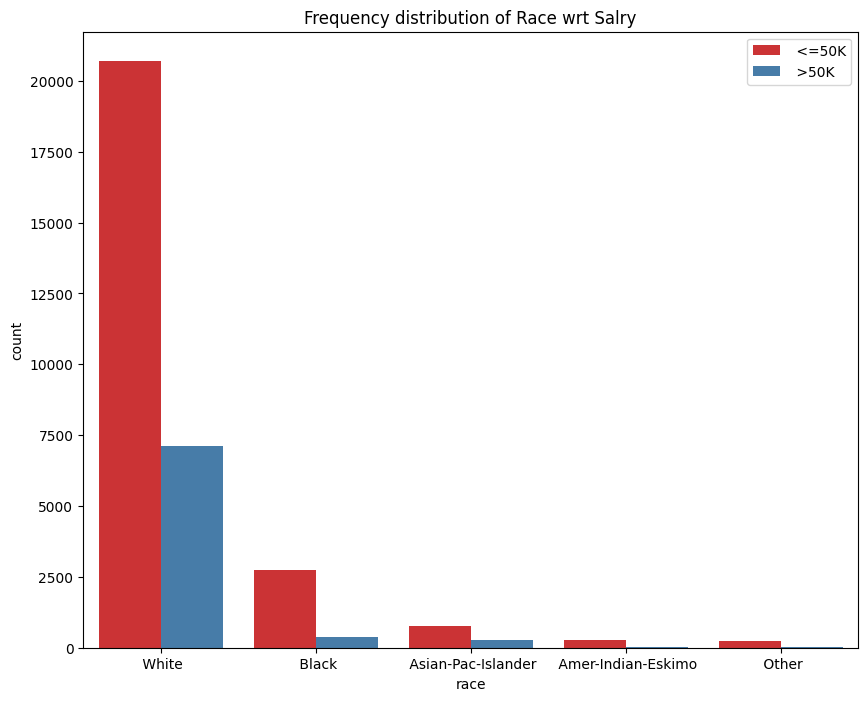

In [58]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="race", hue="salary", data=df, palette="Set1")
ax.set_title("Frequency distribution of Race wrt Salry")
ax.legend(loc='upper right')
plt.show()

This shows that whites makes more money that non_white in both the salary categories

In [59]:
df

age          workclass  fnlwgt    education  education_no_of_years  \
0       39          State-gov   77516    Bachelors                     13   
1       50   Self-emp-not-inc   83311    Bachelors                     13   
2       38            Private  215646      HS-grad                      9   
3       53            Private  234721         11th                      7   
4       28            Private  338409    Bachelors                     13   
...    ...                ...     ...          ...                    ...   
32556   27            Private  257302   Assoc-acdm                     12   
32557   40            Private  154374      HS-grad                      9   
32558   58            Private  151910      HS-grad                      9   
32559   22            Private  201490      HS-grad                      9   
32560   52       Self-emp-inc  287927      HS-grad                      9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  working_hours_per_week  \
0         Male          2174             0                      40   
1         Male             0             0                      13   
2         Male             0             0                      40   
3         Male             0             0                      40   
4       Female             0             0                      40   
...        ...           ...           ...                     ...   
32556   Female             0             0                      38   
32557     Male             0             0                      40   
32558   Female             0             0                      40   
32559     Male             0             0                      20   
32560   Female         15024             0                      40   

       native_country  salary  
0       United-States   <=50K  
1       United-States   <=50K  
2       United-States   <=50K  
3       United-States   <=50K  
4                Cuba   <=50K  
...               ...     ...  
32556   United-States   <=50K  
32557   United-States    >50K  
32558   United-States   <=50K  
32559   United-States   <=50K  
32560   United-States    >50K  

[32561 rows x 15 columns]

In [60]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [61]:
#Creating salary to numerical 
# Before conversion
print(df['salary'].unique())

# Perform the conversion
df['salary'] = df['salary'].replace({' <=50K': 0, ' >50K': 1})

# After conversion
print(df['salary'].unique())

[' <=50K' ' >50K']
[0 1]


In [62]:
df['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [63]:
df['salary'].describe

<bound method NDFrame.describe of 0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64>

In [64]:
num_data = df.select_dtypes(include = 'number')

C:\Users\Rebirthlogo\AppData\Local\Temp\ipykernel_14068\1431392871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat_cor =df.corr()


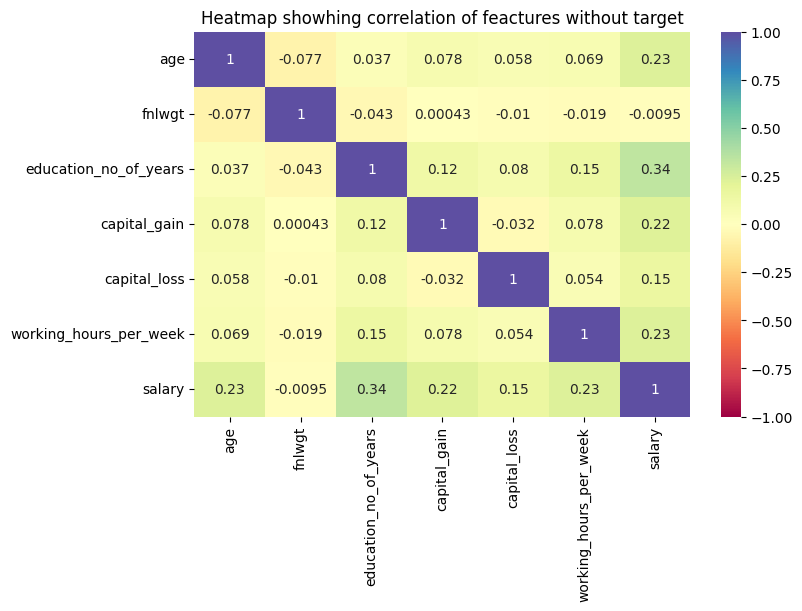

In [65]:
mat_cor =df.corr()

plt.figure(figsize = (8, 5))
sns.heatmap(mat_cor, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral')
plt.title('Heatmap showhing correlation of feactures without target');

This shows that there is no multicollinearity


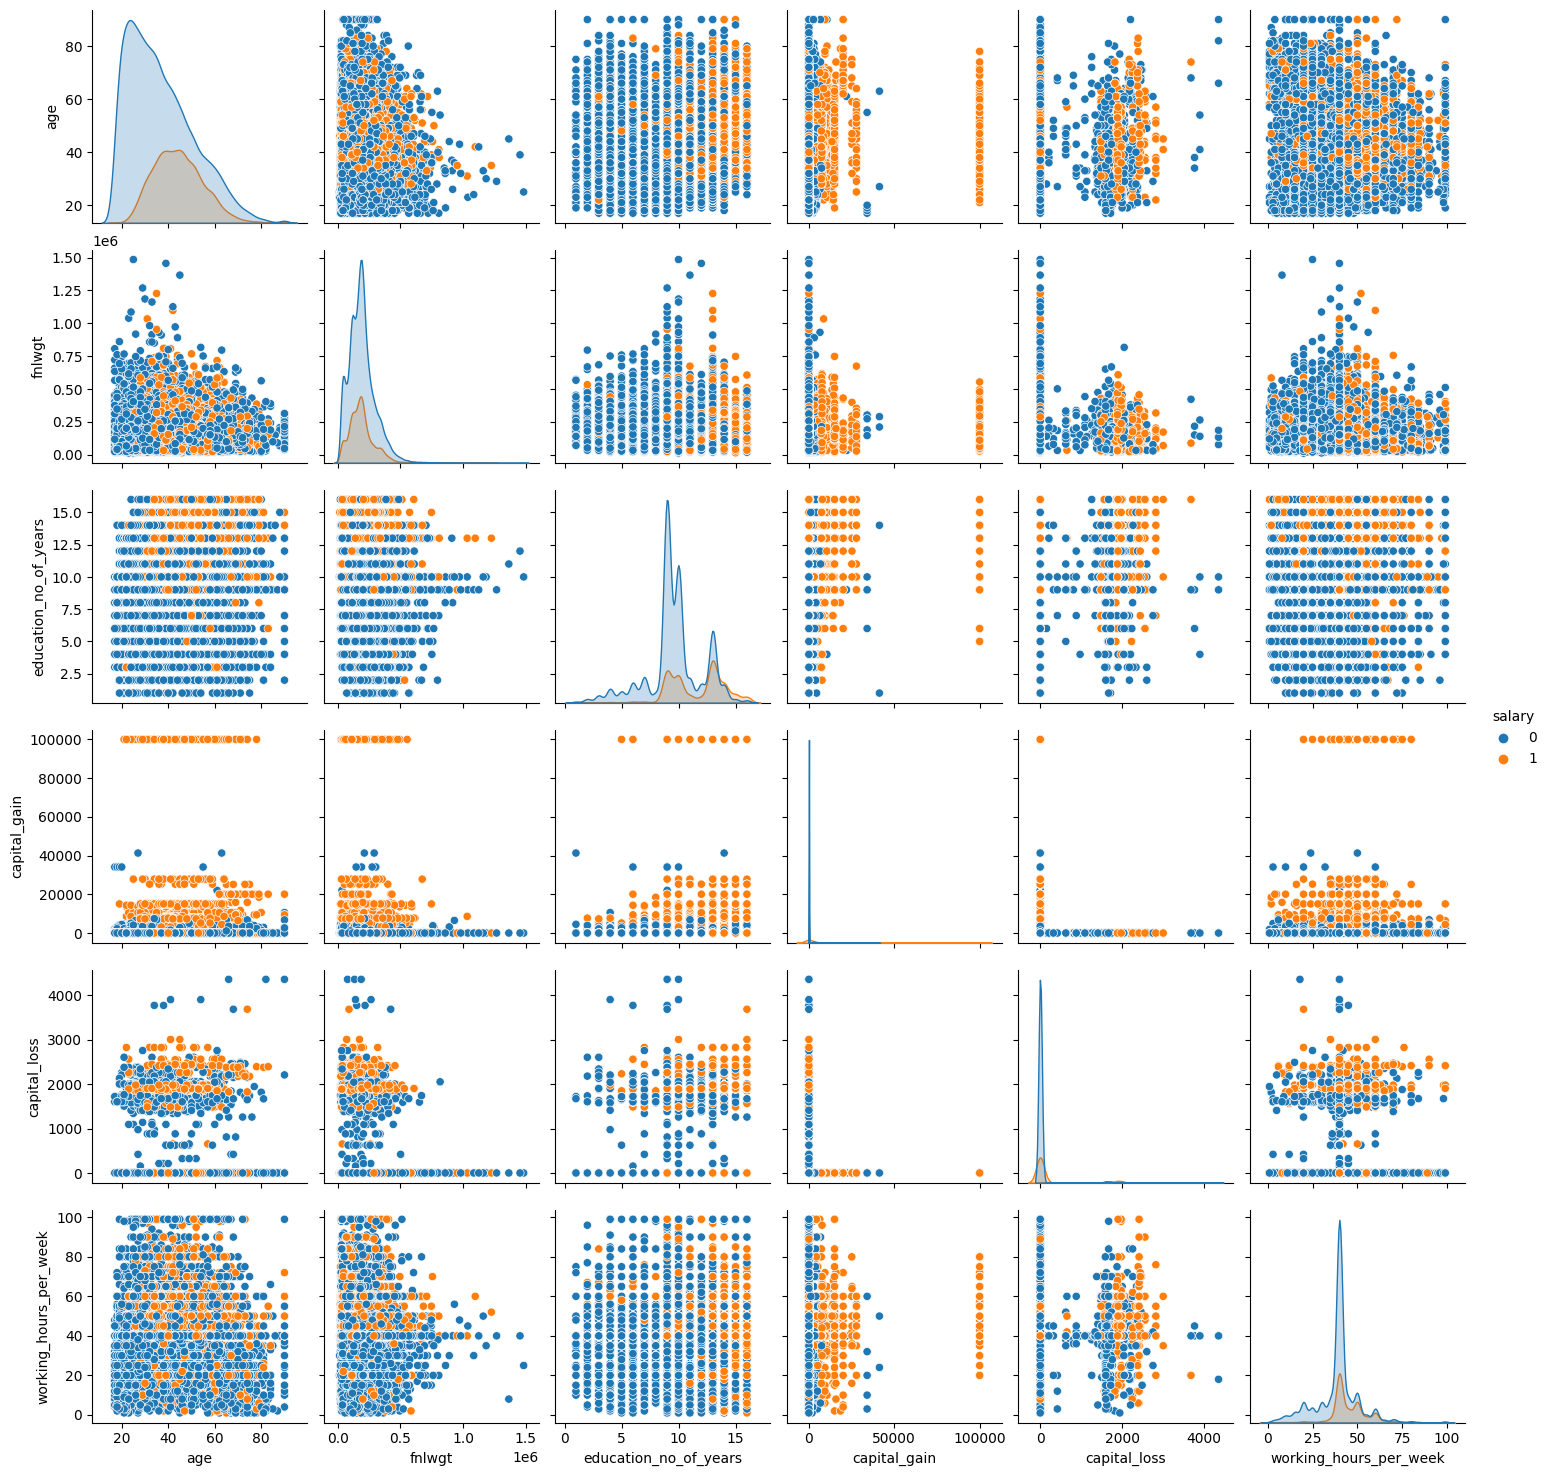

In [66]:
sns.pairplot(df, hue="salary")
plt.show()

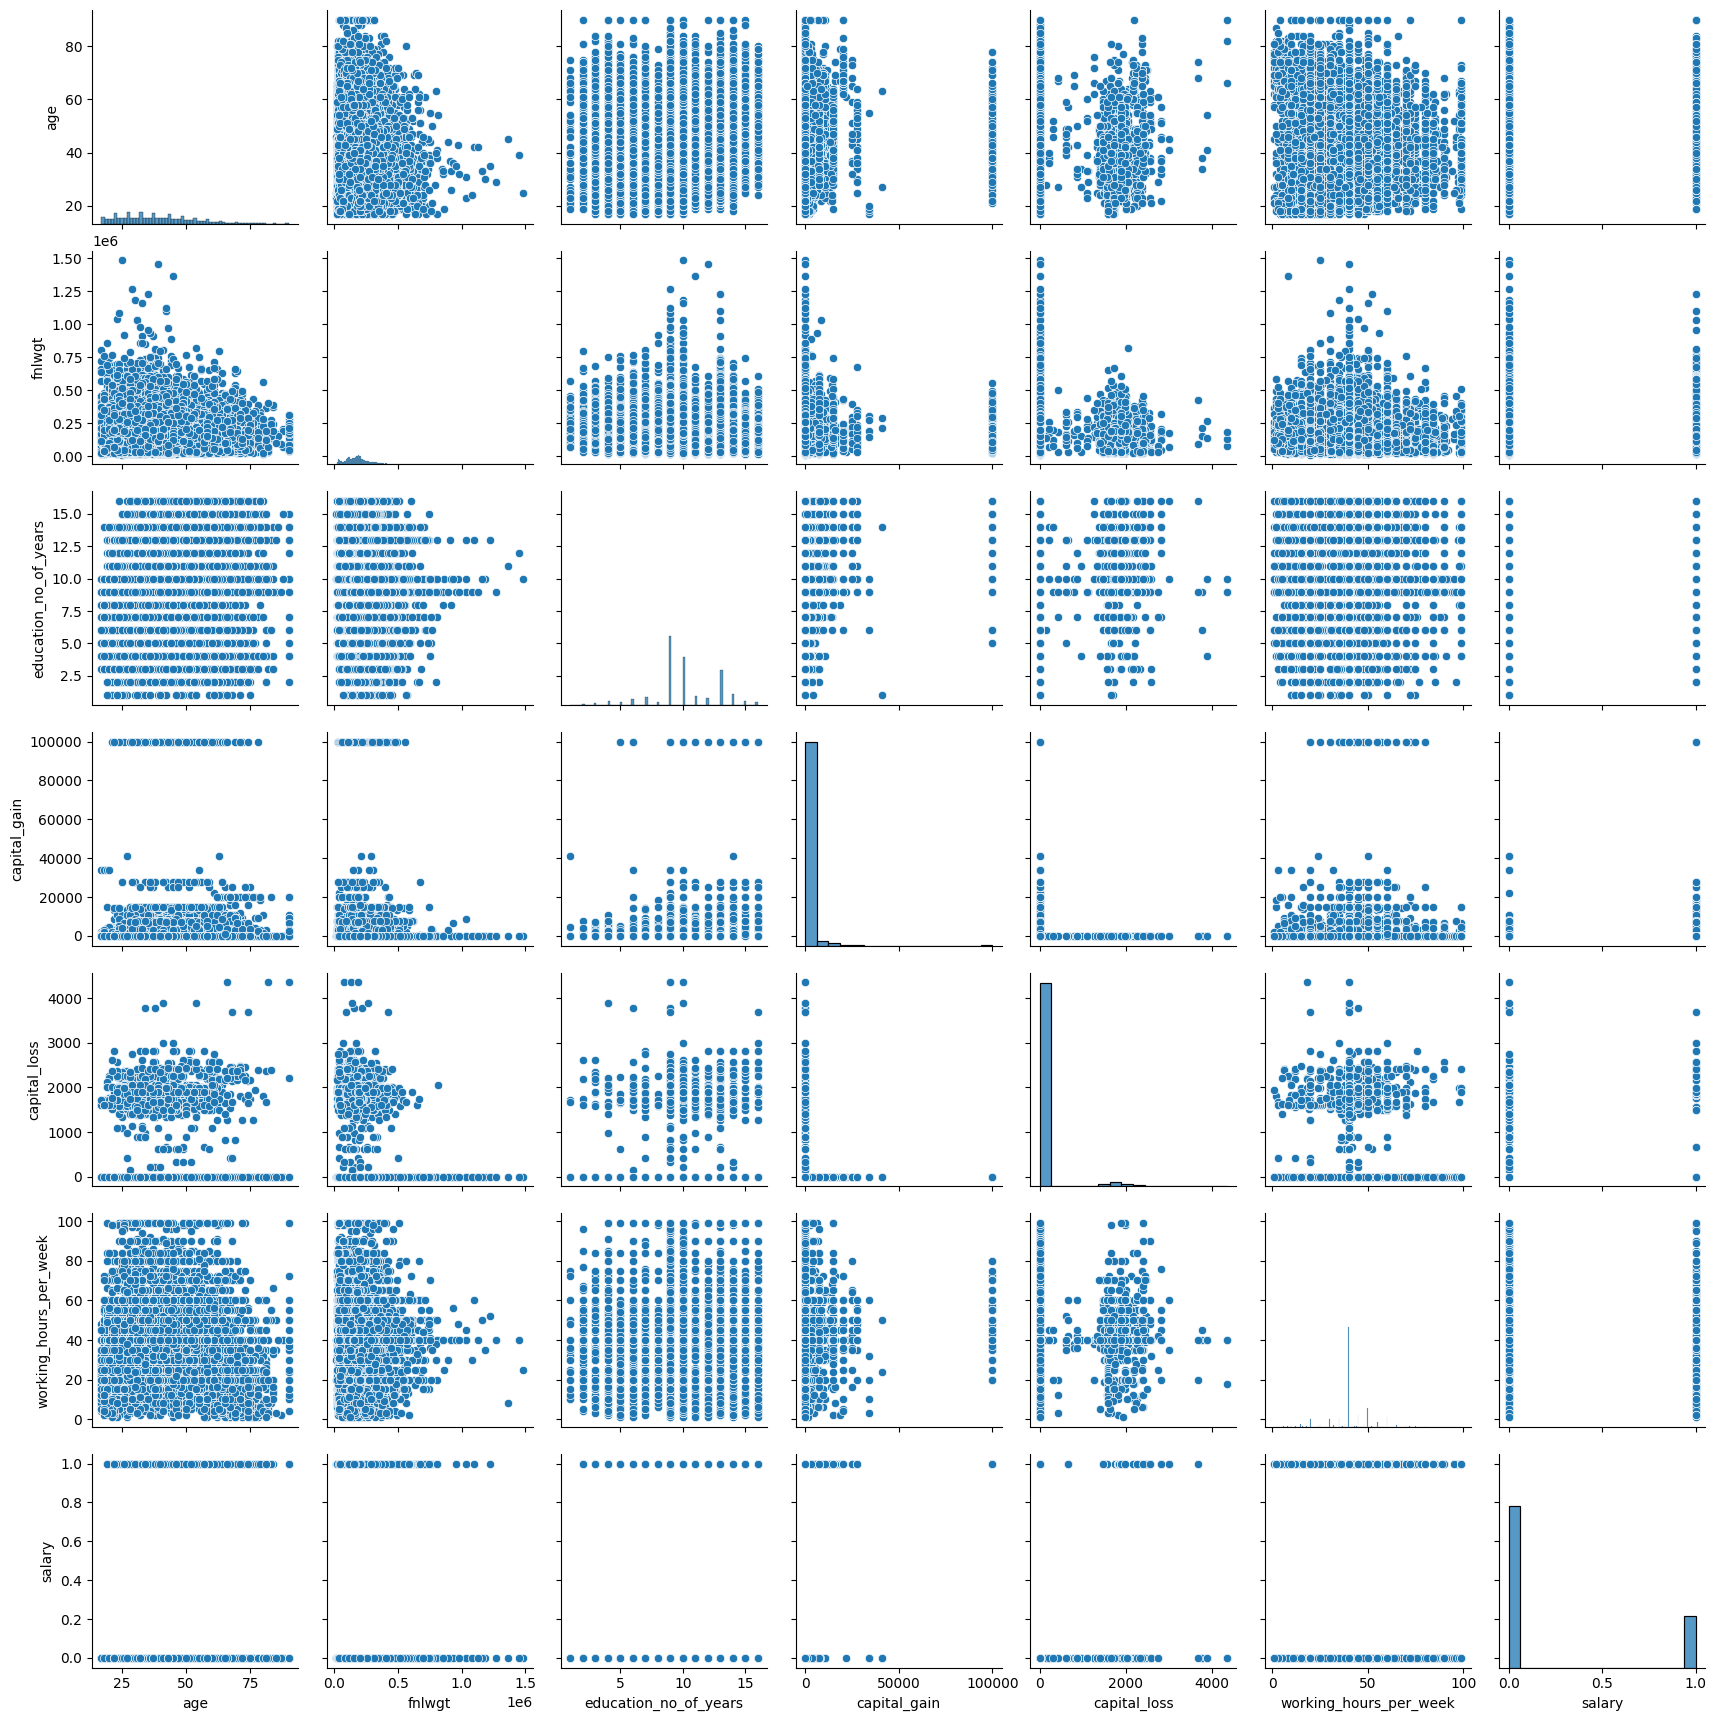

In [67]:
sns.pairplot(df)
plt.show()

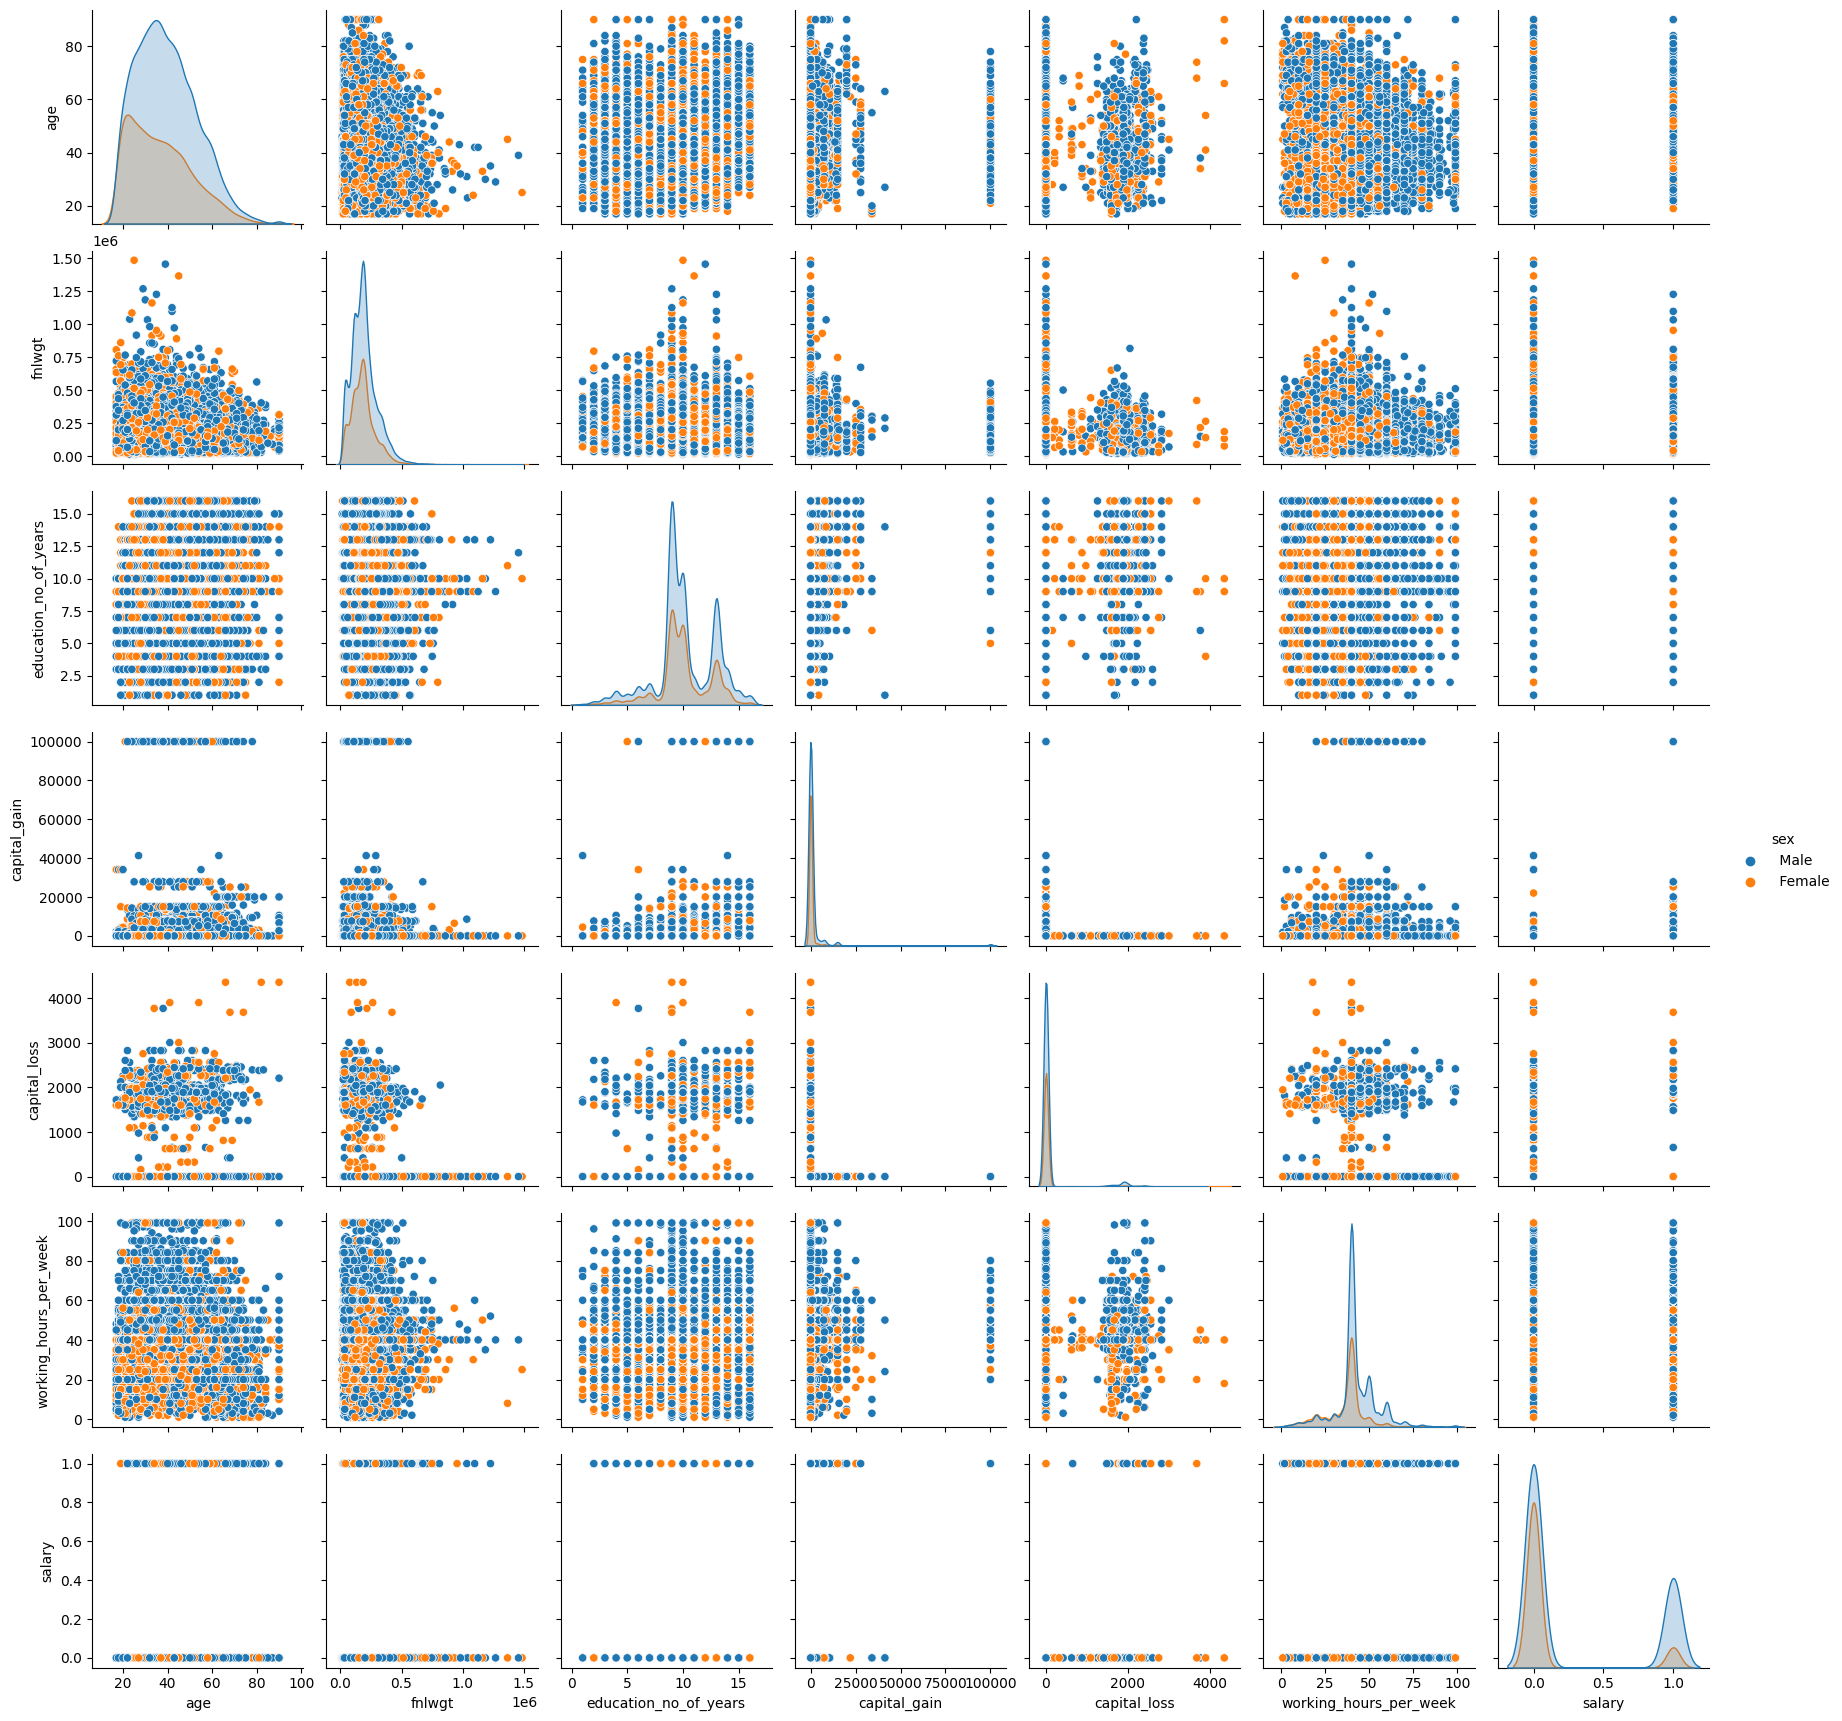

In [68]:
sns.pairplot(df, hue="sex")
plt.show()

In [70]:
df['salary']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [71]:
# check duplicates
df.duplicated().sum()

24

In [72]:
# Remove duplicates
df = df.drop_duplicates()

# Optional: Reset the index
df = df.reset_index(drop=True)

In [73]:
# check duplicates
df.duplicated().sum()

0

In [74]:
df

age          workclass  fnlwgt    education  education_no_of_years  \
0       39          State-gov   77516    Bachelors                     13   
1       50   Self-emp-not-inc   83311    Bachelors                     13   
2       38            Private  215646      HS-grad                      9   
3       53            Private  234721         11th                      7   
4       28            Private  338409    Bachelors                     13   
...    ...                ...     ...          ...                    ...   
32532   27            Private  257302   Assoc-acdm                     12   
32533   40            Private  154374      HS-grad                      9   
32534   58            Private  151910      HS-grad                      9   
32535   22            Private  201490      HS-grad                      9   
32536   52       Self-emp-inc  287927      HS-grad                      9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32532   Married-civ-spouse        Tech-support            Wife   White   
32533   Married-civ-spouse   Machine-op-inspct         Husband   White   
32534              Widowed        Adm-clerical       Unmarried   White   
32535        Never-married        Adm-clerical       Own-child   White   
32536   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  working_hours_per_week  \
0         Male          2174             0                      40   
1         Male             0             0                      13   
2         Male             0             0                      40   
3         Male             0             0                      40   
4       Female             0             0                      40   
...        ...           ...           ...                     ...   
32532   Female             0             0                      38   
32533     Male             0             0                      40   
32534   Female             0             0                      40   
32535     Male             0             0                      20   
32536   Female         15024             0                      40   

       native_country  salary  
0       United-States       0  
1       United-States       0  
2       United-States       0  
3       United-States       0  
4                Cuba       0  
...               ...     ...  
32532   United-States       0  
32533   United-States       1  
32534   United-States       0  
32535   United-States       0  
32536   United-States       1  

[32537 rows x 15 columns]

In [75]:
#checking the correlation

mat_cor = df.corr()

mat_cor

C:\Users\Rebirthlogo\AppData\Local\Temp\ipykernel_14068\1318670385.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat_cor = df.corr()


age    fnlwgt  education_no_of_years  \
age                     1.000000 -0.076447               0.036224   
fnlwgt                 -0.076447  1.000000              -0.043388   
education_no_of_years   0.036224 -0.043388               1.000000   
capital_gain            0.077676  0.000429               0.122664   
capital_loss            0.057745 -0.010260               0.079892   
working_hours_per_week  0.068515 -0.018898               0.148422   
salary                  0.234037 -0.009502               0.335272   

                        capital_gain  capital_loss  working_hours_per_week  \
age                         0.077676      0.057745                0.068515   
fnlwgt                      0.000429     -0.010260               -0.018898   
education_no_of_years       0.122664      0.079892                0.148422   
capital_gain                1.000000     -0.031639                0.078408   
capital_loss               -0.031639      1.000000                0.054229   
working_hours_per_week      0.078408      0.054229                1.000000   
salary                      0.223336      0.150501                0.229658   

                          salary  
age                     0.234037  
fnlwgt                 -0.009502  
education_no_of_years   0.335272  
capital_gain            0.223336  
capital_loss            0.150501  
working_hours_per_week  0.229658  
salary                  1.000000

In [76]:
df.describe()

age        fnlwgt  education_no_of_years  capital_gain  \
count  32537.000000  3.253700e+04           32537.000000  32537.000000   
mean      38.585549  1.897808e+05              10.081815   1078.443741   
std       13.637984  1.055565e+05               2.571633   7387.957424   
min       17.000000  1.228500e+04               1.000000      0.000000   
25%       28.000000  1.178270e+05               9.000000      0.000000   
50%       37.000000  1.783560e+05              10.000000      0.000000   
75%       48.000000  2.369930e+05              12.000000      0.000000   
max       90.000000  1.484705e+06              16.000000  99999.000000   

       capital_loss  working_hours_per_week        salary  
count  32537.000000            32537.000000  32537.000000  
mean      87.368227               40.440329      0.240926  
std      403.101833               12.346889      0.427652  
min        0.000000                1.000000      0.000000  
25%        0.000000               40.000000      0.000000  
50%        0.000000               40.000000      0.000000  
75%        0.000000               45.000000      0.000000  
max     4356.000000               99.000000      1.000000

In [77]:
df['salary'].value_counts(normalize = True)

0    0.759074
1    0.240926
Name: salary, dtype: float64

## Spliting the Data

I used 80% of the data for training and 20% for testing

In [78]:
from sklearn.model_selection import train_test_split

X = df.drop('salary', axis = 1)
y = df['salary']

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.2, stratify = y)

The startify was used instead of random because startify mentain the proportion of the category of the target of both the training and testing  

## Data Preparation

In [80]:
# let check the split
y_train.value_counts(normalize = True)

0    0.759076
1    0.240924
Name: salary, dtype: float64

In [81]:
# let check the split for test
y_test.value_counts(normalize = True)

0    0.759066
1    0.240934
Name: salary, dtype: float64

In [82]:
# check the shape of X_train and X_test

x_train.shape, x_test.shape

((26029, 14), (6508, 14))

In [83]:
# check missing values in X_train

x_train.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
dtype: int64

In [84]:
# # impute missing categorical variables with most frequent value

# for df2 in [x_train, x_test]:
#     df2['workclass'].fillna(x_train['workclass'].mode()[0], inplace=True)
#     df2['occupation'].fillna(x_train['occupation'].mode()[0], inplace=True)
#     df2['native_country'].fillna(x_train['native_country'].mode()[0], inplace=True)

In [85]:
# check missing values in X_train

x_train.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
dtype: int64

In [86]:
x_train.describe()

age        fnlwgt  education_no_of_years  capital_gain  \
count  26029.000000  2.602900e+04           26029.000000  26029.000000   
mean      38.554920  1.902079e+05              10.085405   1084.997042   
std       13.596494  1.056915e+05               2.566625   7433.121747   
min       17.000000  1.228500e+04               1.000000      0.000000   
25%       28.000000  1.182590e+05               9.000000      0.000000   
50%       37.000000  1.789480e+05              10.000000      0.000000   
75%       48.000000  2.377200e+05              12.000000      0.000000   
max       90.000000  1.484705e+06              16.000000  99999.000000   

       capital_loss  working_hours_per_week  
count  26029.000000            26029.000000  
mean      88.308579               40.521841  
std      406.376514               12.299742  
min        0.000000                1.000000  
25%        0.000000               40.000000  
50%        0.000000               40.000000  
75%        0.000000               45.000000  
max     4356.000000               99.000000

### Endcode the Categorical variable 

In [87]:
from sklearn.preprocessing import LabelEncoder
# encoding the target 
label_e = LabelEncoder()
y = label_e.fit_transform(y)

In [88]:
# import category encoders

import category_encoders as e

In [89]:
# encode categorical variables with one-hot encoding

encoder = e.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

# Logistic Regression

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()

x_train_sd = scaler.fit_transform(x_train)
x_test_sd = scaler.transform(x_test)

### Build the Model

In [92]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0, multi_class='multinomial')

log_reg.fit(x_train_sd, y_train)

C:\Users\Rebirthlogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=0)

In [93]:
log_reg.score(x_train_sd, y_train)

0.8499366091666987

In [94]:
#Check for the Predicted wrongly
log_reg.predict(x_test)

C:\Users\Rebirthlogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

This is wrongly predicting that people are recieving above 50K as salary  

In [95]:
log_reg.predict_proba(x_test_sd)

array([[0.9968915 , 0.0031085 ],
       [0.39748599, 0.60251401],
       [0.569501  , 0.430499  ],
       ...,
       [0.99428762, 0.00571238],
       [0.04870616, 0.95129384],
       [0.99746508, 0.00253492]])

The highest one here is 0.99 at zero class and the highest one for the 1 class is 0.03. The mean that, this particular person has 1% is recieving above, the remaing 99% is not recieving above 50K as salary    

## Model Performance Check

In [96]:
#Function to compute different metrics to check performance of regression model

def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)

    # compute accuracy, recall, precision, and F1 score
    acc = accuracy_score(target, pred_class)
    recall = recall_score(target, pred_class, average="weighted")
    precision = precision_score(target, pred_class, average="weighted",zero_division=0)
    f1 = f1_score(target, pred_class, average="weighted")

    # create a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],
    )

    # create a confusion matrix
    conf = confusion_matrix(target, pred_class)

    # plot the confusion matrix with color-coded sections
    plt.figure(figsize=(8, 5))
    sns.heatmap(
        conf,
        annot=True,
        fmt="g",
        cmap=sns.color_palette("Blues", as_cmap=True),
        cbar=False,
    )
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.title("Confusion Matrix", fontweight="bold")
    plt.show()

    return df_perf


## Confusion Matric

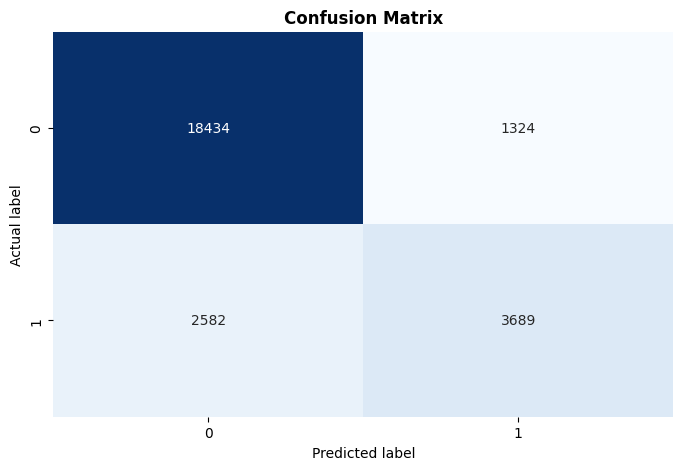

Accuracy    Recall  Precision  F1-score
0  0.849937  0.849937    0.84311  0.843887

In [97]:
log_reg_train = model_performance_classification(log_reg, x_train_sd, y_train)

log_reg_train

Given a new data similar to the one we used to train this model predict accuratly or corretly 85.1 percent of the people are collecting above 50K as salary.

The model correctly predicted that 18420 people are not collecting >50K as salary, also predicted 3720 people are collecting above 50K as salary.

The model is wrongly predictect 1338 who are not collecting above 50K as salary are wrongly predicting them that they are collecting above 50k as salary and wrongly predicting 2551 who are collecting above 50K as salary are wrongly predicting them that they are not collecting above 50K as salary. 

- TN = 18420
- FP = 1338
- FN = 2551
- TP = 3720


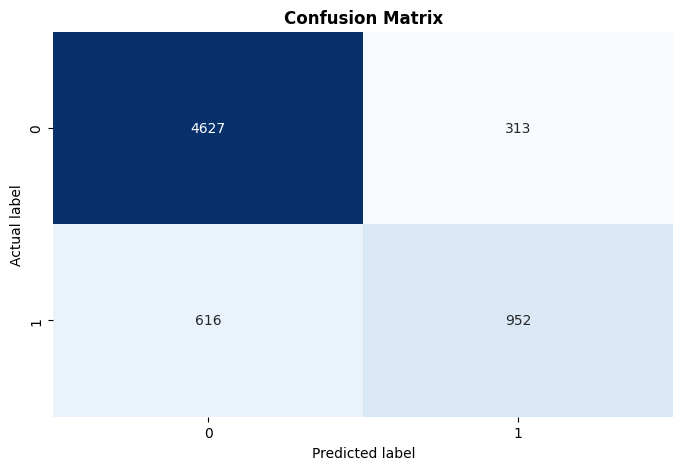

Accuracy    Recall  Precision  F1-score
0  0.857253  0.857253   0.851203  0.851743

In [98]:
log_reg_test = model_performance_classification(log_reg, x_test_sd, y_test)

log_reg_test

# Decision tree Implication in scikit_learn

In [ ]:
dec_tree = DecisonTreeClassifer()